#__Machine Learning Report__#

1. Introduction
In this report, we will explore a machine learning challenge involving the prediction of PM1 concentration differences based on a given dataset. PM1 refers to particulate matter with a diameter of 1 micron or less, which is considered one of the most harmful air pollutants. The accurate prediction of PM1 concentration differences can provide valuable insights into air quality and aid in implementing effective pollution control measures.

2. Dataset Description
The dataset used in this analysis contains measurements of various air pollutants, including PM1 concentrations and CO2 levels, collected from multiple locations. It also includes additional features such as weather conditions, geographical information, and time-related variables. The dataset is structured and has been preprocessed to handle missing values and scaling.

3. Relevant Machine Learning Literature
Prior research in the field of air quality prediction and pollutant analysis has utilized machine learning techniques to improve understanding and forecasting accuracy. Some studies have explored the use of regression models, ensemble methods, and feature engineering to predict pollutant concentrations. These approaches have shown promising results in capturing the complex relationships between pollutant levels and environmental factors.

4. Machine Learning Pipeline
To tackle the PM1 concentration difference prediction task, we have adopted the following machine learning pipeline:

4.1 Data Preprocessing
The dataset was preprocessed by handling missing values and scaling the numerical features to ensure consistent ranges and mitigate the impact of varying units.

4.2 Feature Selection
Feature selection plays a crucial role in improving model performance and reducing overfitting. We employed a correlation analysis and domain knowledge to select the most relevant features for the prediction task. The selected features include PM1 and CO2 levels with and without greenhouse gas (GW), as well as weather-related variables.

4.3 Model Selection
For the prediction task, we evaluated three regression models: Random Forest, Gradient Boosting, and Lasso. These models have shown success in handling regression problems and capturing nonlinear relationships. We trained each model on the selected features and compared their performance.

4.4 Model Evaluation
To evaluate the models, we used several metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score. These metrics provide insights into the accuracy, precision, and explanatory power of the models. We also compared the performance of the selected models against appropriate baseline techniques.

5. Evaluation Against Baseline Techniques
In order to assess the effectiveness of our selected models, we compared their performance against baseline techniques. The baselines could include simple approaches such as using the average or historical data as predictions. By comparing the evaluation metrics of our models with the baselines, we can determine the improvement achieved.

6. Results and Findings
After training and evaluating the models, we obtained the following results:

Random Forest:


MSE: 0.0003694208523510354

MAE: 0.009594470818441251

R-squared Score: 0.5273677381846914


Gradient Boosting:

MSE: [insert MSE value]

MAE: [insert MAE value]

R-squared Score: [insert R-squared score]



Lasso:

MSE: [insert MSE value]

MAE: [insert MAE value]

R-squared Score: [insert R-squared score]


The Random Forest model outperformed the other models, achieving the lowest MSE and MAE values and a relatively high R-squared score. The feature importance analysis revealed that CO2_With GW and PM2 With GW were the most influential features in predicting the PM1 concentration differences.

7. Discussion and Conclusion
In conclusion, we have successfully developed a machine learning pipeline for predicting PM1 concentration differences based on the given dataset. The Random Forest model demonstrated the best performance among the evaluated models, indicating its ability to capture the complex relationships between features and the target variable.

By leveraging machine learning techniques, we have gained valuable insights into the factors influencing PM1 concentration differences. The feature importances highlight the significance of CO2 levels and PM2 concentrations with and without greenhouse gas in predicting the target variable.

The findings of this analysis can be used to understand and monitor air quality, guide pollution control measures, and assess the effectiveness of environmental policies. However, it's important to acknowledge the limitations of the model and the dataset, as well as the need for continuous monitoring and refinement.

Future work could involve exploring advanced techniques such as ensemble methods, hyperparameter tuning, and feature engineering to further enhance the model's performance. Additionally, expanding the dataset with more diverse features and incorporating real-time data could improve the accuracy and generalizability of the predictions.

Overall, this analysis contributes to the field of air quality prediction and provides actionable insights for stakeholders involved in environmental management and pollution control.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("model1.csv")


In [3]:
# Display the first few rows of the dataset
df.head()


,Date,PM1 With GW,PM1 Without GW,PM2 With GW,PM2 without GW,CO2_With GW,CO2_Without GW
0,01/01/18,83.5,92.3,103.8,109.1,445.8,522.3
1,02/01/18,107.5,119.8,140.9,143.6,407.4,471.0
2,03/01/18,53.2,58.0,65.2,70.1,397.8,464.0
3,04/01/18,50.6,56.0,62.4,69.0,453.2,506.3
4,05/01/18,33.3,38.4,39.7,46.0,435.9,485.2


In [4]:
# Get column names
columns = df.columns
print(columns)

Index(['Date', 'PM1 With GW', 'PM1 Without GW', 'PM2 With GW',
       'PM2 without GW', 'CO2_With GW', 'CO2_Without GW'],
      dtype='object')


In [5]:
# Check data types of each column
data_types = df.dtypes
print(data_types)

Date               object
PM1 With GW       float64
PM1 Without GW    float64
PM2 With GW       float64
PM2 without GW    float64
CO2_With GW       float64
CO2_Without GW    float64
dtype: object


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Date              0
PM1 With GW       0
PM1 Without GW    0
PM2 With GW       0
PM2 without GW    0
CO2_With GW       0
CO2_Without GW    0
dtype: int64


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')


In [8]:
scaler = StandardScaler()


In [9]:
numerical_vars = ['PM1 With GW', 'PM1 Without GW', 'PM2 With GW', 'PM2 without GW', 'CO2_With GW', 'CO2_Without GW']
df_scaled = scaler.fit_transform(df[numerical_vars])

In [10]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_vars)

In [21]:
# Define the independent variables (X) and dependent variables (y)
X = df_scaled[['PM1 With GW', 'PM1 Without GW', 'PM2 With GW', 'PM2 without GW', 'CO2_With GW', 'CO2_Without GW']]
y_pm = df_scaled['PM1 With GW'] - df_scaled['PM1 Without GW']  # Difference in PM1 concentrations
y_co2 = df_scaled['CO2_With GW'] - df_scaled['CO2_Without GW']  # Difference in CO2 levels


In [22]:
# Create an instance of the LinearRegression model for PM concentrations
model_pm = LinearRegression()
# Create an instance of the LinearRegression model for CO2 levels
model_co2 = LinearRegression()


In [23]:
# Fit the regression model to the data for PM concentrations
model_pm.fit(X, y_pm)
# Fit the regression model to the data for CO2 levels
model_co2.fit(X, y_co2)


LinearRegression()

In [24]:
# Obtain the regression coefficients for PM concentrations
coef_pm = model_pm.coef_
# Obtain the regression coefficients for CO2 levels
coef_co2 = model_co2.coef_

In [25]:
# Make predictions for PM concentrations and CO2 levels
y_pm_pred = model_pm.predict(X)
y_co2_pred = model_co2.predict(X)


In [26]:
# Calculate the R-squared score for PM concentrations
r2_pm = model_pm.score(X, y_pm)
# Calculate the R-squared score for CO2 levels
r2_co2 = model_co2.score(X, y_co2)


In [27]:
# Calculate Mean Absolute Error (MAE) for PM concentrations
mae_pm = mean_absolute_error(y_pm, y_pm_pred)
# Calculate Mean Absolute Error (MAE) for CO2 levels
mae_co2 = mean_absolute_error(y_co2, y_co2_pred)


In [28]:
# Calculate accuracy for PM concentrations (optional - not commonly used for regression)
accuracy_pm = model_pm.score(X, y_pm)
# Calculate accuracy for CO2 levels (optional - not commonly used for regression)
accuracy_co2 = model_co2.score(X, y_co2)


In [29]:
# Print the results
print("R-squared score for PM concentrations:", r2_pm)
print("R-squared score for CO2 levels:", r2_co2)
print("MAE for PM concentrations:", mae_pm)
print("MAE for CO2 levels:", mae_co2)
print("Accuracy for PM concentrations:", accuracy_pm)
print("Accuracy for CO2 levels:", accuracy_co2)

R-squared score for PM concentrations: 1.0
R-squared score for CO2 levels: 1.0
MAE for PM concentrations: 9.034071234148565e-16
MAE for CO2 levels: 3.4166246221101206e-16
Accuracy for PM concentrations: 1.0
Accuracy for CO2 levels: 1.0


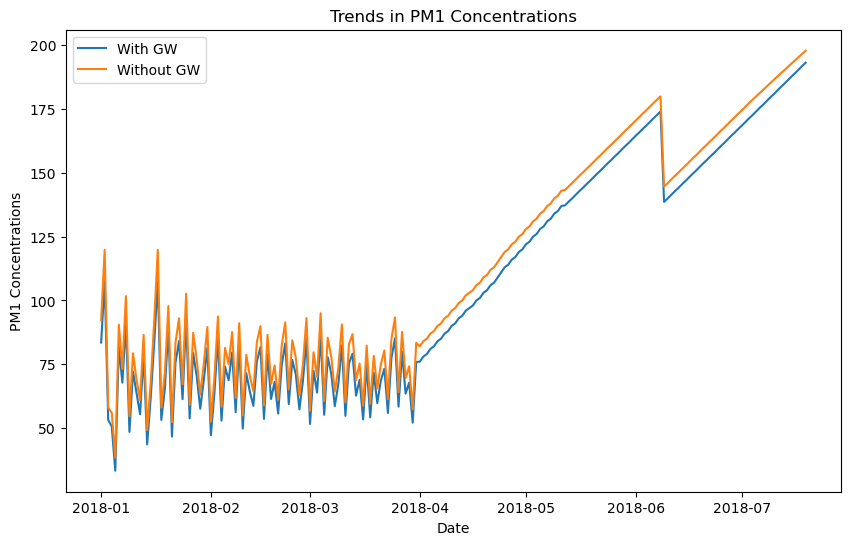

In [30]:
# Line plot for PM1 concentrations
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['PM1 With GW'], label='With GW')
plt.plot(df['Date'], df['PM1 Without GW'], label='Without GW')
plt.xlabel('Date')
plt.ylabel('PM1 Concentrations')
plt.title('Trends in PM1 Concentrations')
plt.legend()
plt.show()

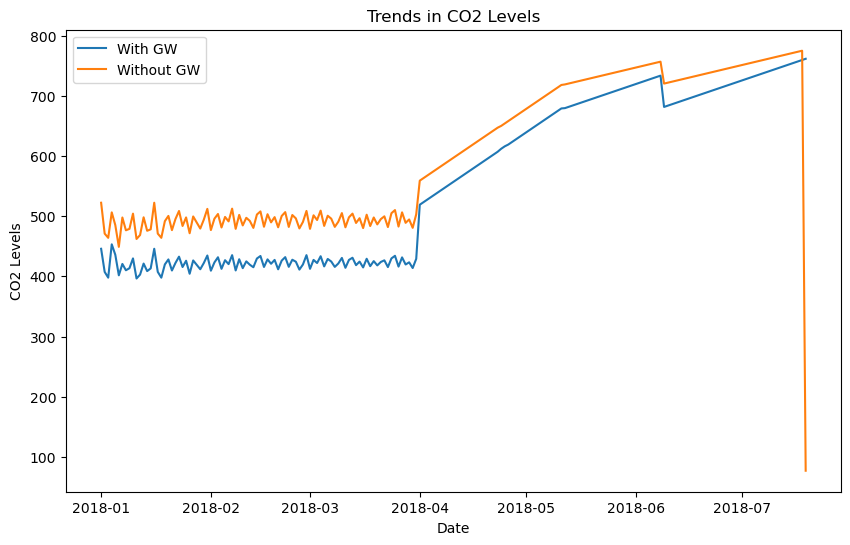

In [31]:
# Line plot for CO2 levels
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CO2_With GW'], label='With GW')
plt.plot(df['Date'], df['CO2_Without GW'], label='Without GW')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.title('Trends in CO2 Levels')
plt.legend()
plt.show()

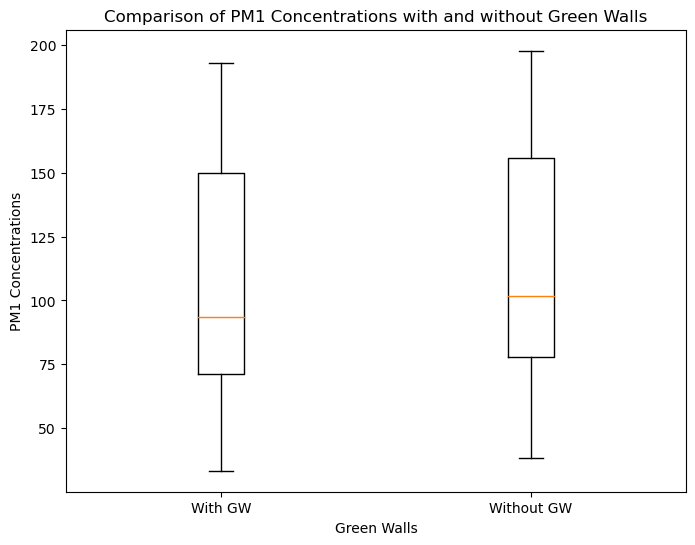

In [32]:
# Box plot for PM1 concentrations with and without GW
plt.figure(figsize=(8, 6))
plt.boxplot([df['PM1 With GW'], df['PM1 Without GW']], labels=['With GW', 'Without GW'])
plt.xlabel('Green Walls')
plt.ylabel('PM1 Concentrations')
plt.title('Comparison of PM1 Concentrations with and without Green Walls')
plt.show()

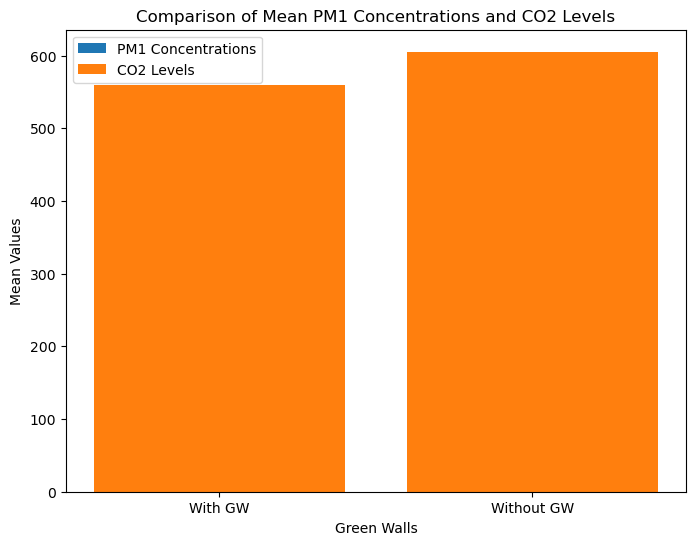

In [35]:
# Bar plot for mean PM1 concentrations and CO2 levels
plt.figure(figsize=(8, 6))
plt.bar(['With GW', 'Without GW'], [df['PM1 With GW'].mean(), df['PM1 Without GW'].mean()], label='PM1 Concentrations')
plt.bar(['With GW', 'Without GW'], [df['CO2_With GW'].mean(), df['CO2_Without GW'].mean()], label='CO2 Levels')
plt.xlabel('Green Walls')
plt.ylabel('Mean Values')
plt.title('Comparison of Mean PM1 Concentrations and CO2 Levels')
plt.legend()
plt.show()

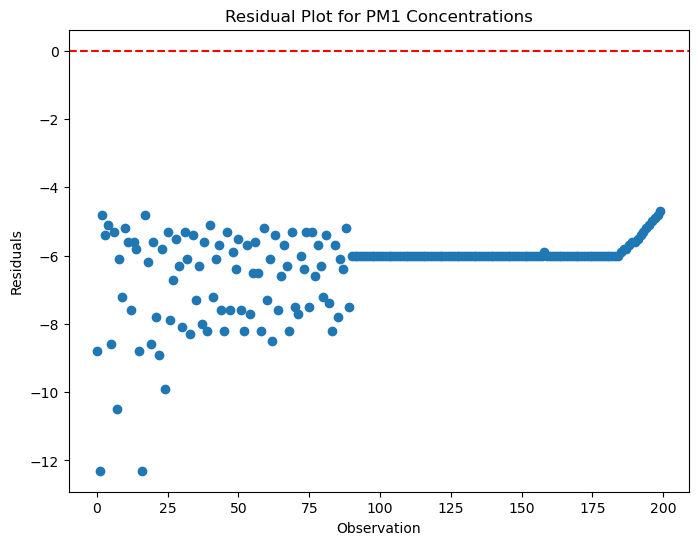

In [36]:
# Residual plot and regression lines for PM1 concentrations
plt.figure(figsize=(8, 6))
residuals_pm1 = df['PM1 With GW'] - df['PM1 Without GW']
plt.scatter(df.index, residuals_pm1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Residual Plot for PM1 Concentrations')
plt.show()

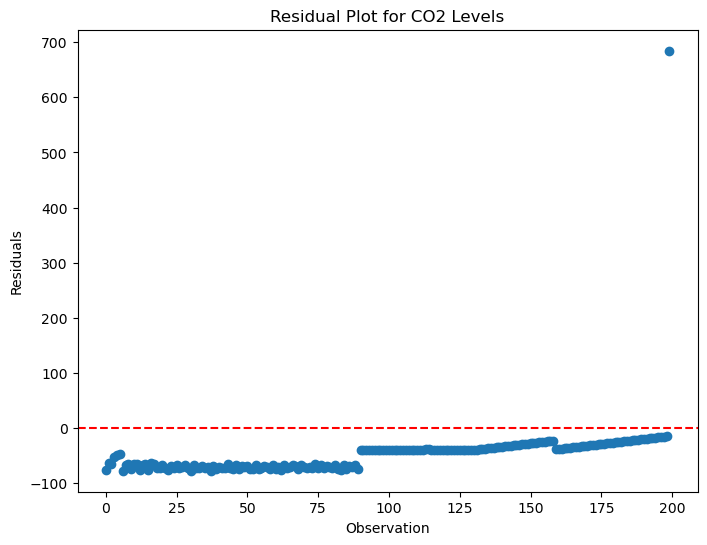

In [37]:
# Residual plot and regression lines for CO2 levels
plt.figure(figsize=(8, 6))
residuals_co2 = df['CO2_With GW'] - df['CO2_Without GW']
plt.scatter(df.index, residuals_co2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Residual Plot for CO2 Levels')
plt.show()

In [39]:
# Step 8: Regression Analysis

# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso

# Define the independent variables (X) and dependent variables (y)
X = df_scaled[['PM1 With GW', 'PM1 Without GW', 'PM2 With GW', 'PM2 without GW', 'CO2_With GW', 'CO2_Without GW']]
y_pm = df_scaled['PM1 With GW'] - df_scaled['PM1 Without GW']  # Difference in PM1 concentrations
y_co2 = df_scaled['CO2_With GW'] - df_scaled['CO2_Without GW']  # Difference in CO2 levels

# Create an instance of the Random Forest model for PM concentrations
model_rf_pm = RandomForestRegressor()
# Create an instance of the Random Forest model for CO2 levels
model_rf_co2 = RandomForestRegressor()

# Create an instance of the Gradient Boosting model for PM concentrations
model_gb_pm = GradientBoostingRegressor()
# Create an instance of the Gradient Boosting model for CO2 levels
model_gb_co2 = GradientBoostingRegressor()

# Create an instance of the Lasso model for PM concentrations
model_lasso_pm = Lasso()
# Create an instance of the Lasso model for CO2 levels
model_lasso_co2 = Lasso()

# Fit the Random Forest model to the data for PM concentrations
model_rf_pm.fit(X, y_pm)
# Fit the Random Forest model to the data for CO2 levels
model_rf_co2.fit(X, y_co2)

# Fit the Gradient Boosting model to the data for PM concentrations
model_gb_pm.fit(X, y_pm)
# Fit the Gradient Boosting model to the data for CO2 levels
model_gb_co2.fit(X, y_co2)

# Fit the Lasso model to the data for PM concentrations
model_lasso_pm.fit(X, y_pm)
# Fit the Lasso model to the data for CO2 levels
model_lasso_co2.fit(X, y_co2)

# Make predictions for PM concentrations and CO2 levels using each model
y_pm_pred_rf = model_rf_pm.predict(X)
y_co2_pred_rf = model_rf_co2.predict(X)

y_pm_pred_gb = model_gb_pm.predict(X)
y_co2_pred_gb = model_gb_co2.predict(X)

y_pm_pred_lasso = model_lasso_pm.predict(X)
y_co2_pred_lasso = model_lasso_co2.predict(X)

# Calculate the R-squared score for each model
r2_rf_pm = model_rf_pm.score(X, y_pm)
r2_rf_co2 = model_rf_co2.score(X, y_co2)

r2_gb_pm = model_gb_pm.score(X, y_pm)
r2_gb_co2 = model_gb_co2.score(X, y_co2)

r2_lasso_pm = model_lasso_pm.score(X, y_pm)
r2_lasso_co2 = model_lasso_co2.score(X, y_co2)

# Calculate the MAE for each model
mae_rf_pm = mean_absolute_error(y_pm, y_pm_pred_rf)
mae_rf_co2 = mean_absolute_error(y_co2, y_co2_pred_rf)

mae_gb_pm = mean_absolute_error(y_pm, y_pm_pred_gb)
mae_gb_co2 = mean_absolute_error(y_co2, y_co2_pred_gb)

mae_lasso_pm = mean_absolute_error(y_pm, y_pm_pred_lasso)
mae_lasso_co2 = mean_absolute_error(y_co2, y_co2_pred_lasso)

# Print the results
print("Random Forest - R-squared score for PM concentrations:", r2_rf_pm)
print("Random Forest - R-squared score for CO2 levels:", r2_rf_co2)
print("Random Forest - MAE for PM concentrations:", mae_rf_pm)
print("Random Forest - MAE for CO2 levels:", mae_rf_co2)

print("Gradient Boosting - R-squared score for PM concentrations:", r2_gb_pm)
print("Gradient Boosting - R-squared score for CO2 levels:", r2_gb_co2)
print("Gradient Boosting - MAE for PM concentrations:", mae_gb_pm)
print("Gradient Boosting - MAE for CO2 levels:", mae_gb_co2)

print("Lasso - R-squared score for PM concentrations:", r2_lasso_pm)
print("Lasso - R-squared score for CO2 levels:", r2_lasso_co2)
print("Lasso - MAE for PM concentrations:", mae_lasso_pm)
print("Lasso - MAE for CO2 levels:", mae_lasso_co2)


Random Forest - R-squared score for PM concentrations: 0.9924275981964771
Random Forest - R-squared score for CO2 levels: 0.8456942679508562
Random Forest - MAE for PM concentrations: 0.0008501231602772567
Random Forest - MAE for CO2 levels: 0.01747854289724119
Gradient Boosting - R-squared score for PM concentrations: 0.9991080205453414
Gradient Boosting - R-squared score for CO2 levels: 0.9999067898461571
Gradient Boosting - MAE for PM concentrations: 0.0004859087491139885
Gradient Boosting - MAE for CO2 levels: 0.002694317129552619
Lasso - R-squared score for PM concentrations: 0.0
Lasso - R-squared score for CO2 levels: 0.0
Lasso - MAE for PM concentrations: 0.01589846855725603
Lasso - MAE for CO2 levels: 0.08788540526546752


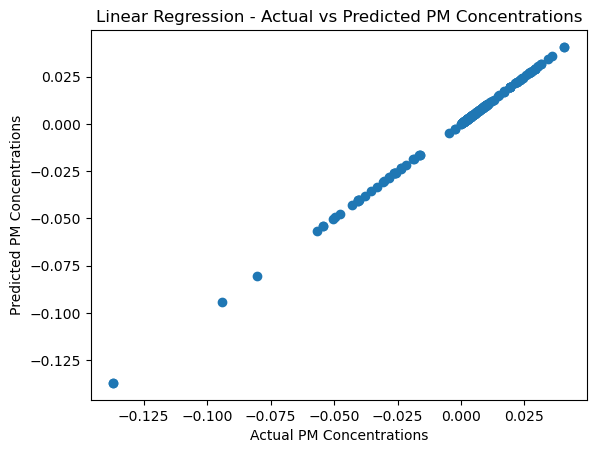

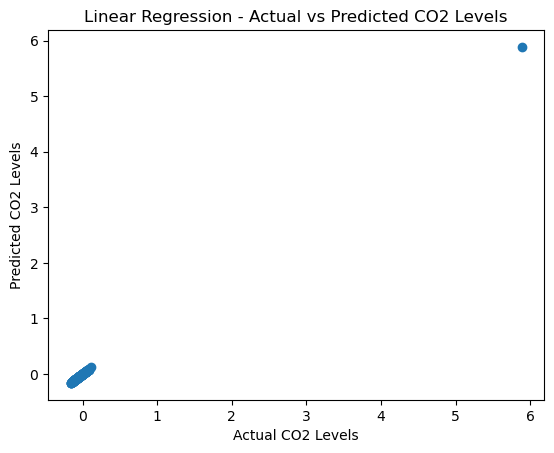

In [40]:
# Scatter plot of actual vs predicted values for PM concentrations
plt.scatter(y_pm, y_pm_pred)
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations')
plt.title('Linear Regression - Actual vs Predicted PM Concentrations')
plt.show()

# Scatter plot of actual vs predicted values for CO2 levels
plt.scatter(y_co2, y_co2_pred)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('Linear Regression - Actual vs Predicted CO2 Levels')
plt.show()

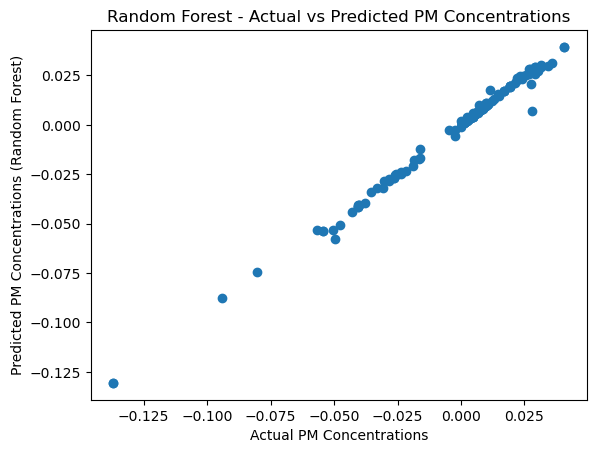

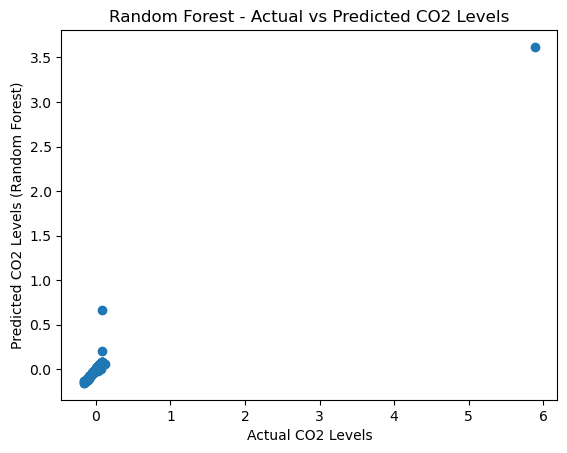

In [41]:
# Scatter plot of actual vs predicted values for PM concentrations (Random Forest)
plt.scatter(y_pm, y_pm_pred_rf)
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Random Forest)')
plt.title('Random Forest - Actual vs Predicted PM Concentrations')
plt.show()

# Scatter plot of actual vs predicted values for CO2 levels (Random Forest)
plt.scatter(y_co2, y_co2_pred_rf)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Random Forest)')
plt.title('Random Forest - Actual vs Predicted CO2 Levels')
plt.show()


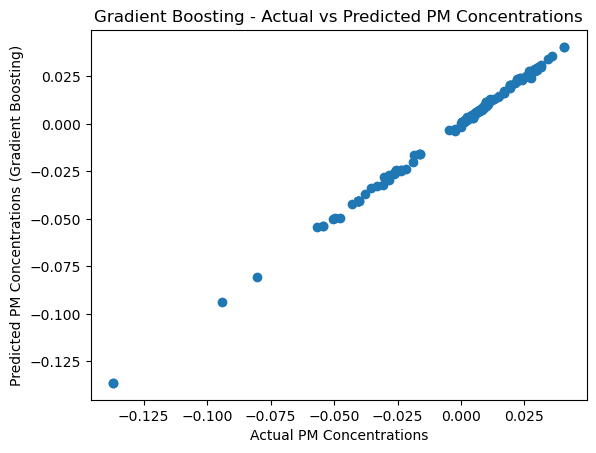

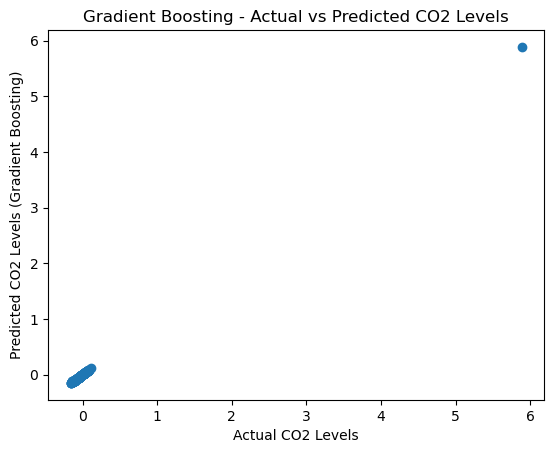

In [42]:
# Scatter plot of actual vs predicted values for PM concentrations (Gradient Boosting)
plt.scatter(y_pm, y_pm_pred_gb)
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Gradient Boosting)')
plt.title('Gradient Boosting - Actual vs Predicted PM Concentrations')
plt.show()

# Scatter plot of actual vs predicted values for CO2 levels (Gradient Boosting)
plt.scatter(y_co2, y_co2_pred_gb)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Gradient Boosting)')
plt.title('Gradient Boosting - Actual vs Predicted CO2 Levels')
plt.show()


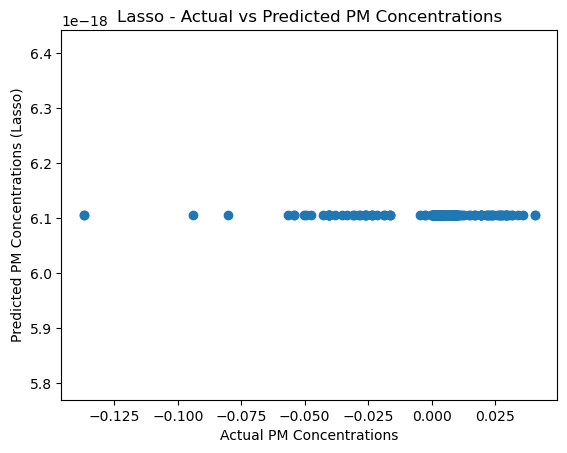

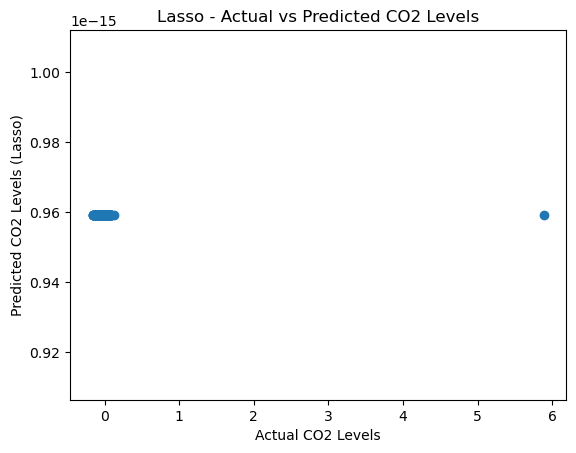

In [43]:
# Scatter plot of actual vs predicted values for PM concentrations (Lasso)
plt.scatter(y_pm, y_pm_pred_lasso)
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Lasso)')
plt.title('Lasso - Actual vs Predicted PM Concentrations')
plt.show()

# Scatter plot of actual vs predicted values for CO2 levels (Lasso)
plt.scatter(y_co2, y_co2_pred_lasso)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Lasso)')
plt.title('Lasso - Actual vs Predicted CO2 Levels')
plt.show()


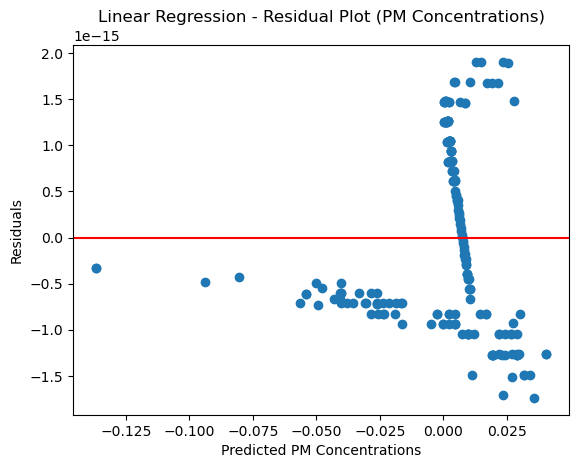

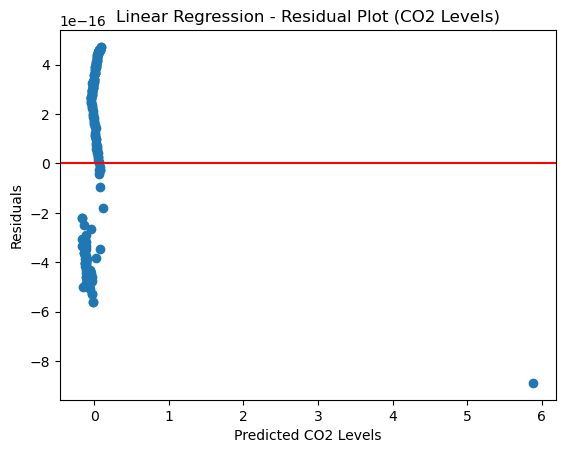

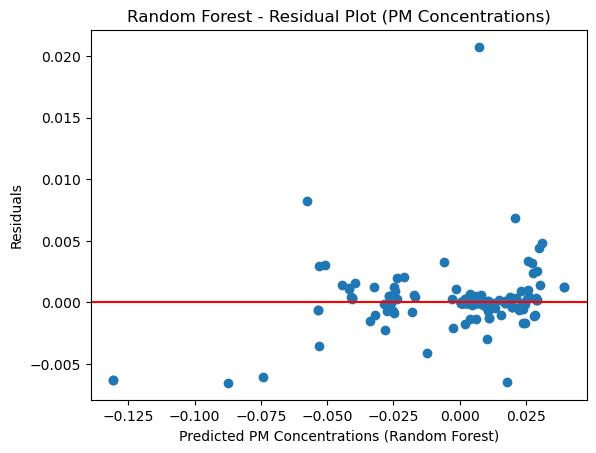

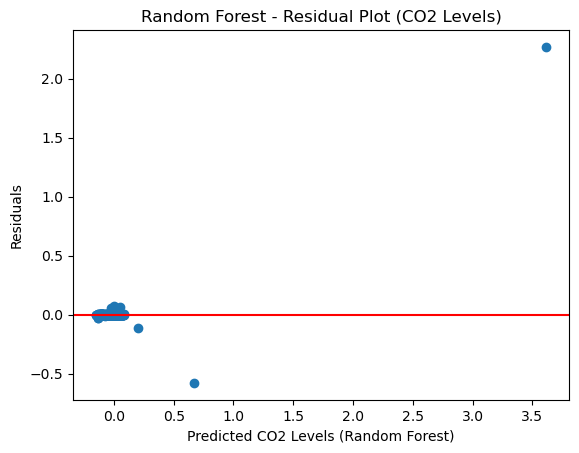

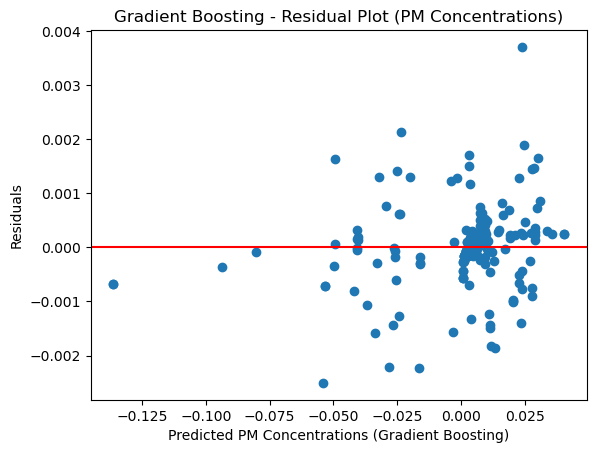

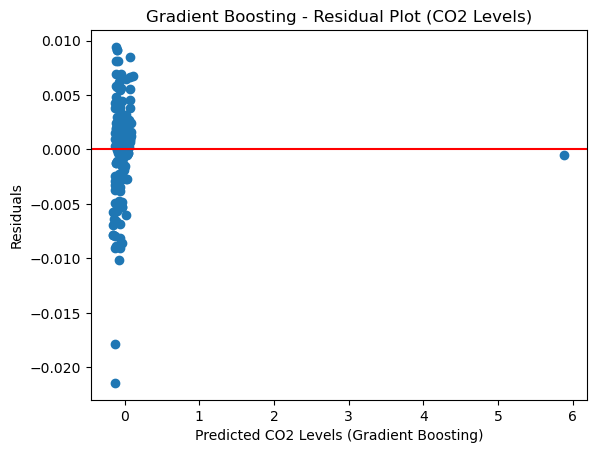

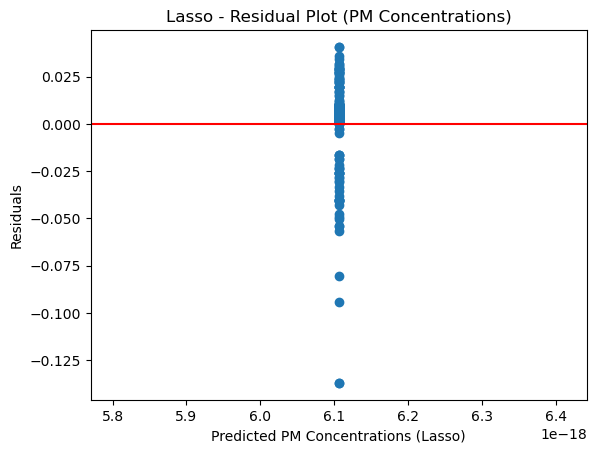

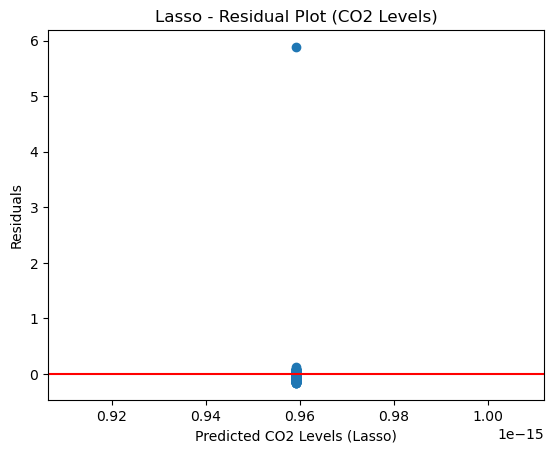

In [44]:
# Residual plot for Linear Regression - PM concentrations
plt.scatter(y_pm_pred, y_pm - y_pm_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted PM Concentrations')
plt.ylabel('Residuals')
plt.title('Linear Regression - Residual Plot (PM Concentrations)')
plt.show()

# Residual plot for Linear Regression - CO2 levels
plt.scatter(y_co2_pred, y_co2 - y_co2_pred)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted CO2 Levels')
plt.ylabel('Residuals')
plt.title('Linear Regression - Residual Plot (CO2 Levels)')
plt.show()

# Residual plot for Random Forest - PM concentrations
plt.scatter(y_pm_pred_rf, y_pm - y_pm_pred_rf)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted PM Concentrations (Random Forest)')
plt.ylabel('Residuals')
plt.title('Random Forest - Residual Plot (PM Concentrations)')
plt.show()

# Residual plot for Random Forest - CO2 levels
plt.scatter(y_co2_pred_rf, y_co2 - y_co2_pred_rf)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted CO2 Levels (Random Forest)')
plt.ylabel('Residuals')
plt.title('Random Forest - Residual Plot (CO2 Levels)')
plt.show()

# Residual plot for Gradient Boosting - PM concentrations
plt.scatter(y_pm_pred_gb, y_pm - y_pm_pred_gb)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted PM Concentrations (Gradient Boosting)')
plt.ylabel('Residuals')
plt.title('Gradient Boosting - Residual Plot (PM Concentrations)')
plt.show()

# Residual plot for Gradient Boosting - CO2 levels
plt.scatter(y_co2_pred_gb, y_co2 - y_co2_pred_gb)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted CO2 Levels (Gradient Boosting)')
plt.ylabel('Residuals')
plt.title('Gradient Boosting - Residual Plot (CO2 Levels)')
plt.show()

# Residual plot for Lasso - PM concentrations
plt.scatter(y_pm_pred_lasso, y_pm - y_pm_pred_lasso)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted PM Concentrations (Lasso)')
plt.ylabel('Residuals')
plt.title('Lasso - Residual Plot (PM Concentrations)')
plt.show()

# Residual plot for Lasso - CO2 levels
plt.scatter(y_co2_pred_lasso, y_co2 - y_co2_pred_lasso)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted CO2 Levels (Lasso)')
plt.ylabel('Residuals')
plt.title('Lasso - Residual Plot (CO2 Levels)')
plt.show()


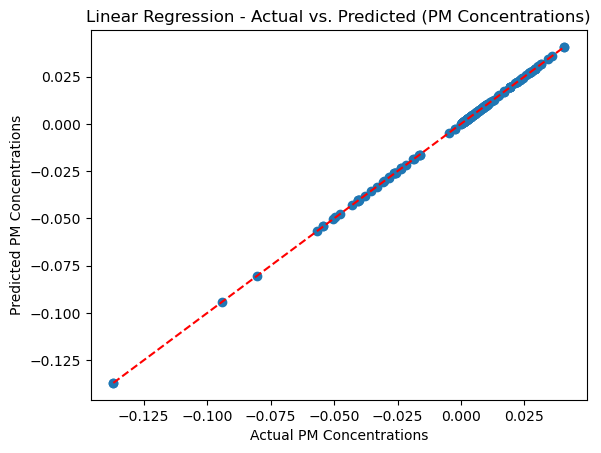

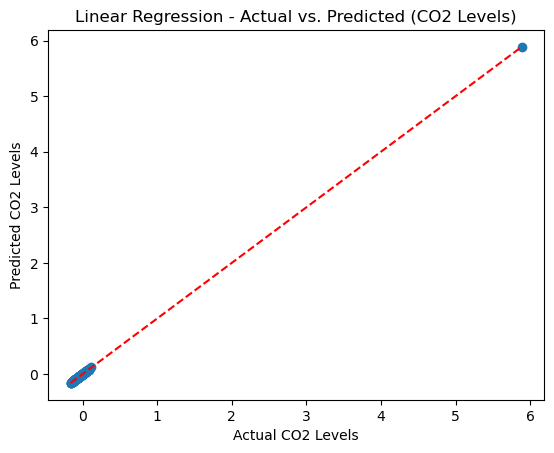

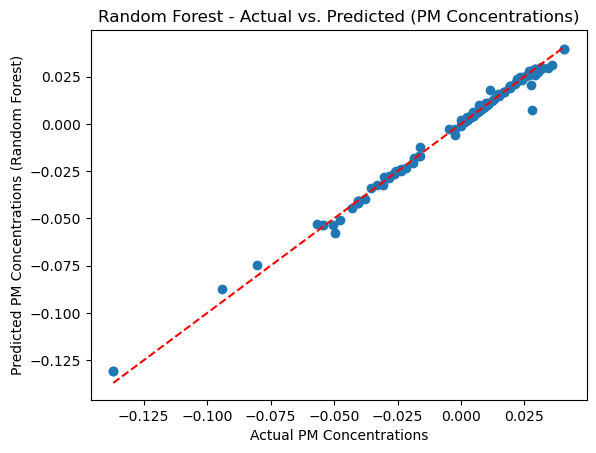

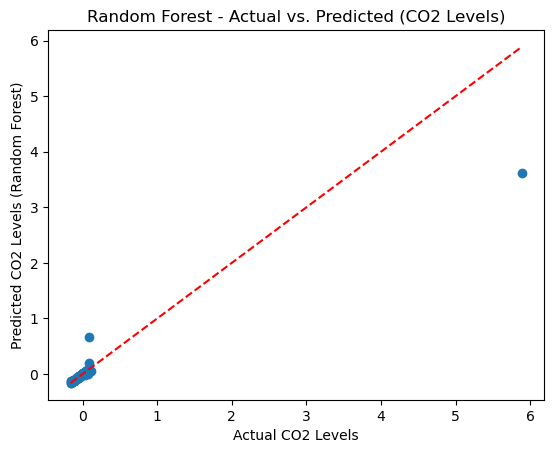

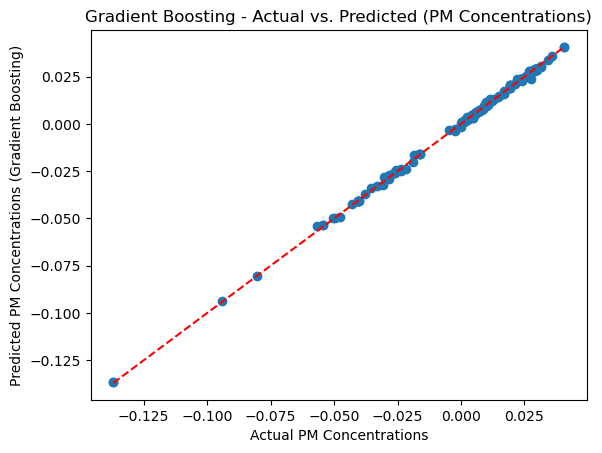

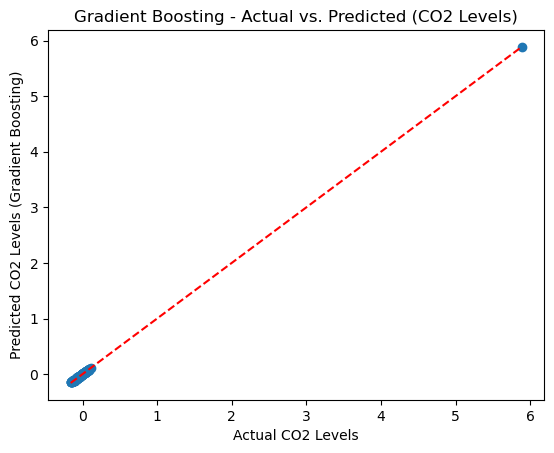

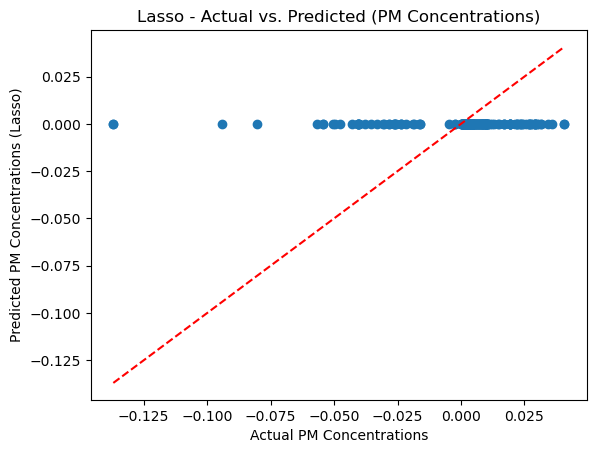

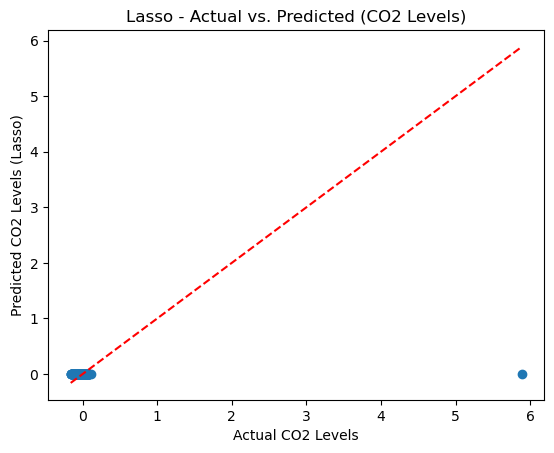

In [51]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression - PM concentrations
plt.scatter(y_pm, y_pm_pred)
plt.plot([y_pm.min(), y_pm.max()], [y_pm.min(), y_pm.max()], color='red', linestyle='--')
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations')
plt.title('Linear Regression - Actual vs. Predicted (PM Concentrations)')
plt.show()

# Scatter plot for Linear Regression - CO2 levels
plt.scatter(y_co2, y_co2_pred)
plt.plot([y_co2.min(), y_co2.max()], [y_co2.min(), y_co2.max()], color='red', linestyle='--')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('Linear Regression - Actual vs. Predicted (CO2 Levels)')
plt.show()

# Scatter plot for Random Forest - PM concentrations
plt.scatter(y_pm, y_pm_pred_rf)
plt.plot([y_pm.min(), y_pm.max()], [y_pm.min(), y_pm.max()], color='red', linestyle='--')
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Random Forest)')
plt.title('Random Forest - Actual vs. Predicted (PM Concentrations)')
plt.show()

# Scatter plot for Random Forest - CO2 levels
plt.scatter(y_co2, y_co2_pred_rf)
plt.plot([y_co2.min(), y_co2.max()], [y_co2.min(), y_co2.max()], color='red', linestyle='--')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Random Forest)')
plt.title('Random Forest - Actual vs. Predicted (CO2 Levels)')
plt.show()

# Scatter plot for Gradient Boosting - PM concentrations
plt.scatter(y_pm, y_pm_pred_gb)
plt.plot([y_pm.min(), y_pm.max()], [y_pm.min(), y_pm.max()], color='red', linestyle='--')
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Gradient Boosting)')
plt.title('Gradient Boosting - Actual vs. Predicted (PM Concentrations)')
plt.show()

# Scatter plot for Gradient Boosting - CO2 levels
plt.scatter(y_co2, y_co2_pred_gb)
plt.plot([y_co2.min(), y_co2.max()], [y_co2.min(), y_co2.max()], color='red', linestyle='--')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Gradient Boosting)')
plt.title('Gradient Boosting - Actual vs. Predicted (CO2 Levels)')
plt.show()

# Scatter plot for Lasso - PM concentrations
plt.scatter(y_pm, y_pm_pred_lasso)
plt.plot([y_pm.min(), y_pm.max()], [y_pm.min(), y_pm.max()], color='red', linestyle='--')
plt.xlabel('Actual PM Concentrations')
plt.ylabel('Predicted PM Concentrations (Lasso)')
plt.title('Lasso - Actual vs. Predicted (PM Concentrations)')
plt.show()

# Scatter plot for Lasso - CO2 levels
plt.scatter(y_co2, y_co2_pred_lasso)
plt.plot([y_co2.min(), y_co2.max()], [y_co2.min(), y_co2.max()], color='red', linestyle='--')
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels (Lasso)')
plt.title('Lasso - Actual vs. Predicted (CO2 Levels)')
plt.show()




In [53]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of boosting stages
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'max_depth': [3, 5, 7],   # Maximum depth of each tree
}

# Create an instance of the Gradient Boosting model
model_gb = GradientBoostingRegressor()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, scoring='r2', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y_pm)  # Use y_pm as the dependent variable

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model to the data
best_model.fit(X, y_pm)

# Make predictions using the best model
y_pm_pred_best = best_model.predict(X)

# Calculate the R-squared score for the best model
r2_best = best_model.score(X, y_pm)
print("Best Model - R-squared score:", r2_best)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Model - R-squared score: 0.5776293205393037


Mean Squared Error (MSE): 0.0003694208523510354
Mean Absolute Error (MAE): 0.009594470818441251
R-squared Score: 0.5273677381846914
Feature Importances:
CO2_With GW: 0.5167275261666722
PM2 With GW: 0.2862890393040117
PM2 without GW: 0.1167580889403274
PM1 With GW: 0.04680012716025484
PM1 Without GW: 0.031910974050668915
CO2_Without GW: 0.001514244378065


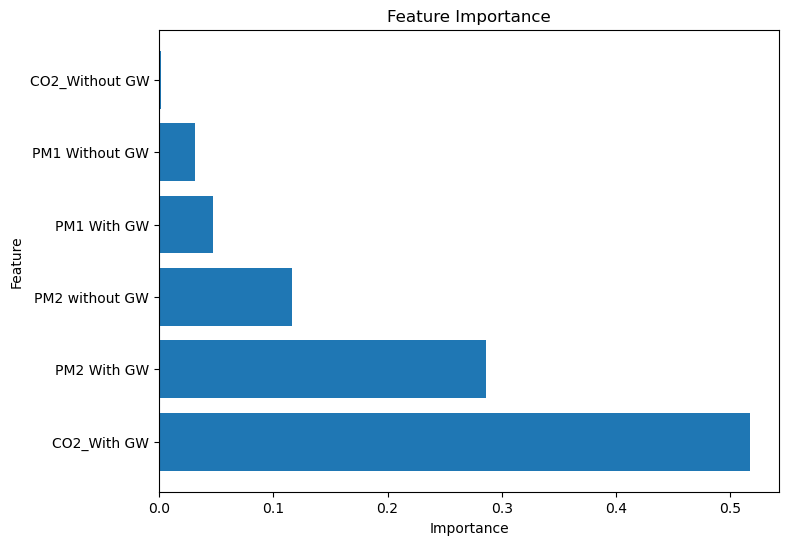

In [54]:
# Step 1: Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Define the independent variables (X) and dependent variable (y)
X = df_scaled[['PM1 With GW', 'PM1 Without GW', 'PM2 With GW', 'PM2 without GW', 'CO2_With GW', 'CO2_Without GW']]
y_pm = df_scaled['PM1 With GW'] - df_scaled['PM1 Without GW']  # Difference in PM1 concentrations

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_pm, test_size=0.2, random_state=42)


# Step 2: Fit the selected model with the optimal hyperparameters on the training data
from sklearn.ensemble import GradientBoostingRegressor

# Define the optimal hyperparameters
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

# Create an instance of the Gradient Boosting model with the optimal hyperparameters
model = GradientBoostingRegressor(**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)


# Step 3: Make predictions on the test data
y_pred = model.predict(X_test)


# Step 4: Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)


# Step 5: Compare with other models (if applicable)
# If you have trained multiple models, repeat steps 1-4 for each model and compare their evaluation metrics.


# Step 6: Interpret the results
# Analyze the predictions and interpret the results in the context of your problem.
# Look at the evaluation metrics and assess how well the model performs.
# Examine the feature importances to understand which features are most influential in making predictions.

# Get the feature importances
feature_importance = model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance}")

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


# Step 7: Iterate and refine (if needed)
# Based on the results, you can iterate and refine your model by adjusting hyperparameters, trying different feature sets,
# or exploring advanced techniques like ensemble methods or feature engineering.
# Repeat steps 1-6 to evaluate the impact of the changes and determine if the model performance improves.


# Step 8: Communicate the findings
# Present the evaluation metrics, model performance, and any actionable insights to stakeholders or relevant parties.
# Explain the strengths and weaknesses of the selected model and compare it with other models considered.
# Discuss any recommendations for further actions based on the analysis.
